In [79]:
#from collection import OrderedDict
def readData():
    cnt = 0
    fp = open("winequality-red.csv","r")   #GlassData
    #fp = open("test.csv","r")
    dict_data = {} # defaultdict(dict) 
    for line in fp:
        if cnt == 0:
            val = line.strip('\n').split(";")
            val1 = val
        if cnt >= 1:
            val = line.strip('\n').split(";")
            dict_data[cnt - 1] = val   #{val[i]: 1}
        cnt += 1
    fp.close()
    return dict_data
    

In [108]:
dict_data = readData()
print(dict_data)

{0: ['7.4', '0.7', '0', '1.9', '0.076', '11', '34', '0.9978', '3.51', '0.56', '9.4', '5'], 1: ['7.8', '0.88', '0', '2.6', '0.098', '25', '67', '0.9968', '3.2', '0.68', '9.8', '5'], 2: ['7.8', '0.76', '0.04', '2.3', '0.092', '15', '54', '0.997', '3.26', '0.65', '9.8', '5'], 3: ['11.2', '0.28', '0.56', '1.9', '0.075', '17', '60', '0.998', '3.16', '0.58', '9.8', '6'], 4: ['7.4', '0.7', '0', '1.9', '0.076', '11', '34', '0.9978', '3.51', '0.56', '9.4', '5'], 5: ['7.4', '0.66', '0', '1.8', '0.075', '13', '40', '0.9978', '3.51', '0.56', '9.4', '5'], 6: ['7.9', '0.6', '0.06', '1.6', '0.069', '15', '59', '0.9964', '3.3', '0.46', '9.4', '5'], 7: ['7.3', '0.65', '0', '1.2', '0.065', '15', '21', '0.9946', '3.39', '0.47', '10', '7'], 8: ['7.8', '0.58', '0.02', '2', '0.073', '9', '18', '0.9968', '3.36', '0.57', '9.5', '7'], 9: ['7.5', '0.5', '0.36', '6.1', '0.071', '17', '102', '0.9978', '3.35', '0.8', '10.5', '5'], 10: ['6.7', '0.58', '0.08', '1.8', '0.097', '15', '65', '0.9959', '3.28', '0.54', '9

In [160]:
#class Starcubing:
#new_dic = defaultdict(dict)
from collections import OrderedDict
def readData_count():   #Count of every value
    cnt = 0
    fp = open("winequality-red.csv","r")
    #fp = open("test.csv","r") #GlassData
    dict1_count = OrderedDict() #{} # defaultdict(dict) 
    for line in fp:
        if cnt == 0:
            val = line.strip('\n').split(";")
            val1 = val
            for j in val:
                dict1_count[j] = {} 
        if cnt >= 1:
            val = line.strip("\n").split(";")
            for i in range(0, len(val)):
                if val[i] in dict1_count[val1[i]].keys():
                    x = dict1_count[val1[i]][val[i]]
                    dict1_count[val1[i]][val[i]] = x + 1
                else:
                    dict1_count[val1[i]][val[i]] = 1   #{val[i]: 1}
        cnt += 1
    fp.close()
    return dict1_count
        
        

In [4]:
dict1_count = readData_count()
print(dict1_count)

OrderedDict([('a', {'a1': 3, 'a2': 2}), ('b', {'b4': 1, 'b1': 2, 'b2': 1, 'b3': 1}), ('c', {'c3': 2, 'c2': 1, 'c1': 1, 'c4': 1}), ('d', {'d4': 2, 'd2': 1, 'd3': 1, 'd1': 1}), ('', {})])


In [161]:
def checkIceberg(dict2, apriori):
    for col_name in dict2.keys():
        for count in dict2[col_name].keys():
            if dict2[col_name][count] < apriori:
                (dict2[col_name][count]) = '*'
    return dict2

In [162]:
def UpdateData(dict_org, dict_count):
    i = 0
    for col_name in dict_count.keys():
        for count in dict_count[col_name].keys():
            if dict_count[col_name][count] == '*':
                for val in dict_org.keys():
                    #for i in range(0, len(dict_org[val])):
                    if dict_org[val][i] == count:
                        #print(dict_org[val][i], count)
                        dict_org[val][i] = '*'
        i = i+1
    return dict_org

                    
    

In [163]:
def reduced_table(dict_table):
    seen = set()
    dict_out = {}
    i = 0
    for count in dict_table.keys():
        t = tuple(dict_table[count])
        if t not in seen:
            seen.add(t)
            #dict_out[i] = dict_table[count]
            dict_out[t] = 1
        else:
            x = dict_out[t]
            dict_out[t] = x + 1
        i = i+1
    return dict_out


In [6]:
class StarTree:
    child = []
    sibling = False
    leaf = True
    sup = 0
    attributes = ""
    def __init__(self):
        pass
    def set_root_sp(self, sup):
        self.sup = sup
    def set_attr(self, sup, attributes):
        self.sup = sup
        self.attributes = attributes
    #def child_check():
     #   child_temp = root.child
        
    #def Create_Tree(row, count):
     #   return
        

In [7]:
def child_check(parent, attr):
    child_temp = parent.child
    tmp = StarTree()
    if not child_temp:
        return None
    else:
        for i in range(0, len(child_temp)):
            tmp = child_temp[i]
            #print(tmp.attributes)
            if tmp.attributes == attr:
                return tmp

In [11]:
def Create_Tree(row, count):
    current = root
    for i in range(0, len(row)):
        status = child_check(current, row[i])
        if status is None:
            newnode = StarTree()
            newnode.set_attr(count, row[i])
            if(i == len(row) - 1):
                newnode.leaf = True
            current.child.append(newnode)
            if(len(current.child) > 1):
                current.sibling = True
            current = newnode
        else:
            current = status
            current.sup = current.sup + 1
        
    

In [13]:
def depthfirstsearch(root):
    if not root.child:
        return 
    else:
        for i in range(0,len(root.child)):
            #print(root.attributes)
            depthfirstsearch(root.child[i])
    return

In [174]:
#from operator import itemgetter
dict_data = readData()
dict1_count = readData_count()
apriori = 15
dict_iceberg = checkIceberg(dict1_count,apriori)
dict_updated_data = UpdateData(dict_data, dict_iceberg)
dict_reduced = reduced_table(dict_updated_data)
#total_count = sum(dict_reduced.values())
#sorted(dict_reduced.items(), key = lambda x: '*')
#print(dict_reduced)
#print(dict1_count), 
lexico_sorted = sorted(dict_reduced.items()) #, key = lambda x : x[0])
#(x[0][0], x[0][1],x[0][2],x[0][3],x[0][4],x[0][5],x[0][6],x[0][7],x[0][8],x[0][9],x[0][10],x[0][11]))
print(lexico_sorted)
#root = StarTree()
#root.set_root_sp(total_count)
#for val in dict_reduced.keys():
#    Create_Tree(val, dict_reduced[val])
#print((root.child))
#depthfirstsearch(root)
#for i in range(0, len(root.child)):
 #   print(root.attributes, root.sup)



[(('*', '*', '*', '*', '*', '6', '43', '*', '*', '0.68', '11.2', '7'), 1), (('*', '*', '*', '*', '0.083', '7', '42', '*', '*', '0.73', '10', '7'), 2), (('*', '*', '*', '*', '0.088', '6', '24', '0.9988', '*', '*', '*', '6'), 1), (('*', '*', '*', '*', '0.104', '4', '23', '*', '3.28', '*', '10.1', '6'), 3), (('*', '*', '*', '1.4', '*', '3', '*', '*', '3.16', '0.51', '11.8', '6'), 1), (('*', '*', '*', '1.8', '0.074', '3', '*', '*', '3.14', '0.7', '9.9', '6'), 1), (('*', '*', '*', '2', '*', '15', '*', '*', '*', '0.6', '11.5', '6'), 1), (('*', '*', '*', '2.1', '0.084', '5', '15', '*', '*', '0.7', '9.2', '6'), 1), (('*', '*', '*', '2.3', '0.065', '7', '26', '*', '3.17', '0.53', '12.5', '6'), 1), (('*', '*', '*', '2.4', '0.088', '13', '35', '*', '3.1', '0.6', '10.4', '6'), 1), (('*', '*', '*', '2.6', '0.082', '6', '21', '*', '3.16', '0.67', '9.7', '6'), 1), (('*', '*', '*', '2.9', '0.085', '17', '43', '*', '*', '0.8', '10', '6'), 2), (('*', '*', '*', '3.4', '*', '7', '21', '*', '3.17', '*', '*

In [237]:
## Calculate execution time of the code
import time
start_time = time.time()
def readData():
    cnt = 0
    
    fp = open("winequality-red.csv","r")   #GlassData
    dict_data = {} # defaultdict(dict) 
    for line in fp:
        if cnt == 0:
            val = line.strip("\n").split(";")
            val1 = val
        if cnt >= 1:
            val = line.strip('\n').split(";")
            dict_data[cnt - 1] = val   #{val[i]: 1}
        cnt += 1
    fp.close()
    return dict_data   
from collections import OrderedDict
def readData_count():   #Count of every value
    cnt = 0
    fp = open("winequality-red.csv","r")
    #fp = open("test.csv","r") #GlassData
    dict1_count = OrderedDict() #{} # defaultdict(dict) 
    for line in fp:
        if cnt == 0:
            val = line.strip('\n').split(";")
            val1 = val
            for j in val:
                dict1_count[j] = {} 
        if cnt >= 1:
            val = line.strip("\n").split(";")
            for i in range(0, len(val)):
                if val[i] in dict1_count[val1[i]].keys():
                    x = dict1_count[val1[i]][val[i]]
                    dict1_count[val1[i]][val[i]] = x + 1
                else:
                    dict1_count[val1[i]][val[i]] = 1   #{val[i]: 1}
        cnt += 1
    fp.close()
    return dict1_count
def checkIceberg(dict2, apriori):
    for col_name in dict2.keys():
        for count in dict2[col_name].keys():
            if dict2[col_name][count] < apriori:
                (dict2[col_name][count]) = '*'
    return dict2
def UpdateData(dict_org, dict_count):
    i = 0
    for col_name in dict_count.keys():
        for count in dict_count[col_name].keys():
            if dict_count[col_name][count] == '*':
                for val in dict_org.keys():
                    #for i in range(0, len(dict_org[val])):
                    if dict_org[val][i] == count:
                        #print(dict_org[val][i], count)
                        dict_org[val][i] = '*'
        i = i+1
    return dict_org  
def reduced_table(dict_table):
    seen = set()
    dict_out = {}
    i = 0
    for count in dict_table.keys():
        t = tuple(dict_table[count])
        if t not in seen:
            seen.add(t)
            #dict_out[i] = dict_table[count]
            dict_out[t] = 1
        else:
            x = dict_out[t]
            dict_out[t] = x + 1
        i = i+1
    return dict_out

class newNode: 
    def __init__(self, data): 
        self.elem = data  
        #self.left = self.right = None
        self.children = [None]
        self.childNum = 0
        self.sibling = None
        self.count = 0

        
def insertChild(newElem, parent, count):
    if parent.childNum==0:#execute if it is the first child
        n = newNode(newElem)
        n.count=count
        parent.children[parent.childNum]=n
        parent.childNum+=1
        return n
    if newElem != parent.children[parent.childNum-1].elem:#execute if there are no identical children
        n = newNode(newElem)
        n.count=count
        if parent.childNum > 0:#make current child a sibling if there are other children
            parent.children[parent.childNum-1].sibling = n
        parent.children.append(n)
        parent.childNum+=1
        return n
    else:
        parent.children[parent.childNum-1].count+=count
        return parent.children[parent.childNum-1]#return previous child if the current child is 
                                                    #identical to previous child (works if db is sorted)
    
    
    
    
def makeTree(db, root):
    root = newNode(len(db))
    count=0
    n = None
    for tup in db:
        count=0
        root.count+=tup[1]#adds the count of all direct children to root's count
        for elem in tup[0]:#gives the elements in the single tuple inside each Large tuple
            if count==0:
                n = insertChild(elem, root, tup[1])
            else:
                n = insertChild(elem, n, tup[1])
            count+=1
    return root
            
    
def bottomUpPrint(tree): 
    count = 0
    if tree.children[0] != None:
        for child in tree.children:
            bottomUp(tree.children[count])
            count+=1
    print(tree.elem, tree.count)
    
def giveSiblings(tree):
    count = 0
    if tree.children[0] != None:
        for child in tree.children:
            giveSiblings(tree.children[count])
            count+=1
    if tree.sibling != None:
        print(tree.elem)
        print(tree.sibling.elem)


if __name__ == '__main__':
    dict_data = readData()
    dict1_count = readData_count()
    apriori = 5
    dict_iceberg = checkIceberg(dict1_count,apriori)
    dict_updated_data = UpdateData(dict_data, dict_iceberg)
    dict_reduced = reduced_table(dict_updated_data)

    tp = sorted(dict_reduced.items())
    print(tp)
    root = None
    theTree = makeTree(tp, root)
    print(time.time() - start_time)


    

        
        

    


[(('*', '*', '0', '1.7', '0.044', '14', '86', '*', '3.56', '*', '12.9', '7'), 1), (('*', '*', '0.09', '1.5', '*', '7', '19', '*', '3.5', '0.48', '9.8', '4'), 1), (('*', '*', '0.48', '2', '*', '6', '18', '0.9979', '3.3', '0.71', '10.5', '5'), 1), (('*', '*', '0.66', '2', '*', '15', '88', '*', '*', '0.6', '11.5', '6'), 1), (('*', '*', '0.68', '2.9', '0.085', '17', '43', '1.0014', '3.06', '0.8', '10', '6'), 2), (('*', '0.21', '0.44', '2.2', '0.075', '10', '24', '*', '3.07', '0.84', '9.2', '7'), 2), (('*', '0.26', '0.52', '1.8', '0.071', '6', '10', '0.9968', '3.2', '0.72', '10.2', '7'), 1), (('*', '0.26', '0.68', '*', '0.085', '10', '25', '0.997', '3.18', '0.61', '11.8', '5'), 1), (('*', '0.27', '*', '2.6', '0.082', '6', '21', '1.0002', '3.16', '0.67', '9.7', '6'), 1), (('*', '0.28', '0.47', '1.7', '0.054', '17', '32', '*', '3.15', '0.67', '10.6', '7'), 1), (('*', '0.29', '*', '2.8', '0.084', '23', '43', '0.9986', '3.04', '0.68', '11.4', '7'), 1), (('*', '0.29', '0.26', '1.7', '0.063', '3'

In [57]:
## Calculate execution time of the code
#Wine_quality, Bank Marketing, Forest Fires, wine, breastcancer, abalone
#db1 = ["winequality-red.csv", "forestfires.csv", "bank-full.csv", "wine.data", "breast-cancer-wisconsin.data", "abalone.data"]
db1 = [100, 250, 450, 700, 900, 1200, 1450, 1700, 1850, 2000]
for dbname in db1:
    import time
    from collections import OrderedDict

    start_time = time.time()
    #if (".data" or "forestfires") in dbname:
     #   delimiter = ","
    #else:
     #   delimiter = ";"

    def readData():
        cnt = 0

        fp = open("bank-full.csv","r")   #GlassData
        #fp = open("forestfires.csv","r")  
        #fp = open("bank-full.csv","r")
        #fp = open("wine.data","r") 
        #fp = open("breast-cancer-wisconsin.data","r") 
        #fp =  open(dbname)     #open("abalone.data","r") 
        dict_data = {} # defaultdict(dict) 
        for line in fp:
            if cnt == 0:
                val = line.strip("\n").split(";")            #.split(",")
                val1 = val
            if cnt >= 1:
                val = line.strip('\n').split(";")             #.split(",")
                dict_data[cnt - 1] = val   #{val[i]: 1}
            if cnt >= dbname:
                break
            cnt += 1
        fp.close()
        return dict_data   

    def readData_count():   #Count of every value
        cnt = 0
        fp = open("bank-full.csv","r")
        #fp = open("forestfires.csv","r") 
        #fp = open("bank-full.csv","r")
        #fp = open("wine.data","r") 
        #fp = open("breast-cancer-wisconsin.data","r") 
        #fp =  open(dbname)  #open("abalone.data","r") 
        #fp = open("test.csv","r") #GlassData
        dict1_count = OrderedDict() #{} # defaultdict(dict) 
        for line in fp:
            if cnt == 0:
                val = line.strip('\n').split(";")                #.split(",")
                val1 = val
                for j in val:
                    dict1_count[j] = {} 
            if cnt >= 1:
                val = line.strip("\n").split(";")                #.split(",")
                for i in range(0, len(val)):
                    if val[i] in dict1_count[val1[i]].keys():
                        x = dict1_count[val1[i]][val[i]]
                        dict1_count[val1[i]][val[i]] = x + 1
                    else:
                        dict1_count[val1[i]][val[i]] = 1   #{val[i]: 1}
            if cnt >= dbname:
                break
            cnt += 1
        fp.close()
        return dict1_count
    
    def checkIceberg(dict2, apriori):
        for col_name in dict2.keys():
            for count in dict2[col_name].keys():
                if dict2[col_name][count] < apriori:
                    (dict2[col_name][count]) = '*'
        return dict2

    def UpdateData(dict_org, dict_count):
        i = 0
        for col_name in dict_count.keys():
            for count in dict_count[col_name].keys():
                if dict_count[col_name][count] == '*':
                    for val in dict_org.keys():
                        if dict_org[val][i] == count:
                            dict_org[val][i] = '*'
            i = i+1
        return dict_org  

    def reduced_table(dict_table):
        seen = set()
        dict_out = {}
        i = 0
        for count in dict_table.keys():
            t = tuple(dict_table[count])
            if t not in seen:
                seen.add(t)
                dict_out[t] = 1
            else:
                x = dict_out[t]
                dict_out[t] = x + 1
            i = i+1
        return dict_out


    class newNode: 
        def __init__(self, data): 
            self.elem = data  
            self.parent = None
            self.children = [None]
            self.childNum = 0
            self.sibling = None
            self.count = 0
            self.level = 0
            self.lastInsertion=None#Only used for root node


    def insertChild(newElem, parent, count):
        if parent.childNum==0:#execute if it is the first child
            n = newNode(newElem)
            n.count=count
            n.parent=parent
            n.level=parent.level+1
            parent.children[parent.childNum]=n
            parent.childNum+=1
            return n
        if newElem != parent.children[parent.childNum-1].elem:#execute if there are no identical children
            n = newNode(newElem)
            n.count=count
            n.parent=parent
            n.level=parent.level+1
            if parent.childNum > 0:#make current child a sibling if there are other children
                parent.children[parent.childNum-1].sibling = n
            parent.children.append(n)
            parent.childNum+=1
            return n
        else:
            parent.children[parent.childNum-1].count+=count
            return parent.children[parent.childNum-1]#return previous child if the current child is 
                                                        #identical to previous child (works if db is sorted)

    def insertChild2(newElem, parent, count):
        if parent.childNum==0:#execute if it is the first child
            n = newNode(newElem)
            n.count=count
            n.parent=parent
            n.level=parent.level+1
            parent.children[parent.childNum]=n
            parent.childNum+=1
            return n
        for child in parent.children:
            if newElem != child.elem:#execute if there are no identical children
                0
            else:
                child.count+=count
                return child#return previous child if the current child is 
                                                       #identical to previous child (works if db is sorted)
        n = newNode(newElem)
        n.count=count
        n.parent=parent
        n.level=parent.level+1
        if parent.childNum > 0:#make current child a sibling if there are other children
            parent.children[parent.childNum-1].sibling = n
        parent.children.append(n)
        parent.childNum+=1
        return n


    def makeTree(db, root):
        root = newNode('root')
        count=0
        n = None
        for tup in db:
            count=0
            root.count+=tup[1]#adds the count of all direct children to root's count
            for elem in tup[0]:#gives the elements in the single tuple inside each Large tuple
                if count==0:
                    n = insertChild(elem, root, tup[1])
                else:
                    n = insertChild(elem, n, tup[1])
                count+=1
        return root


    def bottomUpPrint(tree): 
        count = 0
        if tree.children[0] != None:#if the node has children execute
            for child in tree.children:
                bottomUp(tree.children[count])
                count+=1
        print(tree.elem, tree.count)

    def giveSiblings(tree):
        count = 0
        if tree.children[0] != None:
            for child in tree.children:
                giveSiblings(tree.children[count])
                count+=1
        if tree.sibling != None:
            print(tree.elem)
            print(tree.sibling.elem)

    ##########################traversal code below


    def getSubroot(nodeList, listLength):#create new subroot
        count1=0
        rootString=""
        subroot=None
        while count1 != len(nodeList):
            rootString=rootString+" "+nodeList[count1]
            count1+=1
        subroot=newNode(0)
        subroot.level=count1+1
        count1=1
        while count1 < (listLength-len(nodeList)):
            rootString=rootString+(chr(ord('A')+len(nodeList)+count1))
            count1+=1
        subroot.elem=rootString
        return subroot

    def lastChild(tree):
        if tree.children[0] != None:
            return lastChild(tree.children[0])
        return tree


    def nodeAtLevel2(root, insert):
        if root.lastInsertion!=None:
            return root.lastInsertion
        else: 
            return root


    def printChildrenAndLeftBranch(node):
        while node.children[0]!=None:
            printImmediateChildren(node)
            node=node.children[0]

    def printImmediateChildren(node):
        list=[]
        for child in node.children:
            if child !=None:
                list.append(child.elem)
        #print(list)

    def getChildrenCount(node):
        count=0
        for child in node.children:
            count+=child.count
        return count

    def insertIntoSubTrees2(subTrees, insert):
        parent=None
        for subTree in subTrees:
            parent=nodeAtLevel2(subTree, insert)
            if parent.level==insert.level-1:
                subTree.lastInsertion=insertChild2(insert.elem, parent, insert.count)
                subTree.lastInsertion.parent.count=getChildrenCount(subTree.lastInsertion.parent)#updating count


    def recPruning(currentNode, iceberg):
        if currentNode.count < iceberg:
            currentNode=currentNode.parent#go to parent and then delete fail child and update parent count
            currentNode.count-=currentNode.children[0].count
            currentNode.children.pop(0)
            if currentNode.count < iceberg:#if parent no longer passes iceberg either
                if currentNode.parent!=None:
                    return currentNode
                else:
                    return None
            else:
                return recPruning(currentNode.children[0], iceberg)
        return currentNode


    def createSubTrees3(currentNode, dimension, traversedNodes, subTrees, iceberg):
        while currentNode.children[0]!=None:
            parentElem=currentNode.elem
            currentNode=currentNode.children[0]
            currentNode=recPruning(currentNode, iceberg)
            if currentNode.elem==parentElem:
                break
            insertIntoSubTrees2(subTrees, currentNode)
            subTree=getSubroot(traversedNodes, dimension)
            subTree.count=currentNode.parent.count
            traversedNodes.append(currentNode.elem)#old
            subTrees.append(subTree)
        return currentNode



    def traversal2(currentNode, listOfTuples, iceberg):
        dimension=len(listOfTuples[0][0])
        subTrees=[]
        traversedNodes=[]
        treeRoot=currentNode
        for i in range(len(listOfTuples)):
            #print("Begin down")
            currentNode=createSubTrees3(currentNode, dimension, traversedNodes, subTrees, iceberg)#updates subTrees traversedNodes, not currentNode
            #print("Begin Up")
            currentNode=goUp2(currentNode, subTrees, traversedNodes, iceberg)
            if len(subTrees)==0:
                break#end traversal once there are no more subTrees




    def printWholeTree(subTree):
        if subTree.children[0]!=None:
            print('children of ', subTree.elem, " are")
            printImmediateChildren(subTree)
            for child in subTree.children:
                printWholeTree(child)



    def deleteBranch(tree):#deletes 1st branch and returns it
        list=[]
        if tree.children[0] != None:
            tree.count-=lastChild(tree).count
            list.append(tree.children[0].elem)
            list+=deleteBranch(tree.children[0])
            if tree.children[0].count == 0:
                tree.children.pop(0)
                if len(tree.children)==0:
                    tree.children=[None]
        else:
            tree.count=0
        return list

    def printBranch(tree):
        list=[]
        count=lastChild(tree).count
        list.append(tree.elem)
        list.append(deleteBranch(tree))
        list.append(count)
        #print(list)
        global printCount
        printCount+=1

    def printTree(subTree):
        while subTree.children[0]!=None:
            printBranch(subTree)
        if subTree.count==0:
            subTree=None
        else:
            printBranch(subTree)



    def goUp2(currentNode, subTrees, traversedNodes, iceberg):
        count=0
        while currentNode.sibling==None:
            if len(subTrees)==0:#throws error at end if otherwise
                break
            currentNode=currentNode.parent
            printTree(subTrees[-1])
            subTrees.pop()
            traversedNodes.pop()
            for sub in subTrees:#moves the last position of insertion up as we traverse up for all trees
                if sub.lastInsertion!=None:
                    sub.lastInsertion=sub.lastInsertion.parent
        for sub in subTrees:
            if sub.lastInsertion!=None:
                sub.lastInsertion=sub.lastInsertion.parent#does this one more time for all trees
        if len(subTrees)!=0:#throws error at end if otherwise
            currentNode=currentNode.parent
            currentNode.children.pop(0)
            traversedNodes.pop()#old
            traversedNodes.append(currentNode.children[0].elem)#
            currentNode=currentNode.children[0]#
        insertIntoSubTrees2(subTrees, currentNode)
        return currentNode




    # Driver Code 
    if __name__ == '__main__': 
        dict_data = readData()
        dict1_count = readData_count()
        apriori = 75
        dict_iceberg = checkIceberg(dict1_count,apriori)
        dict_updated_data = UpdateData(dict_data, dict_iceberg)
        dict_reduced = reduced_table(dict_updated_data)

        lexico_sorted = sorted(dict_reduced.items())
        #print(dict_data)
        root = None
        #tp = [(('a1', 'b*', 'c*', 'd*'), 1), (('a1', 'b1', 'c*', 'd*'), 2), (('a2', 'b*', 'c3', 'd4'), 2)]

        theTree = makeTree(lexico_sorted, root)
        printCount=0
        traversal2(theTree, lexico_sorted, apriori)
        print(dbname,time.time() - start_time)
        #print(printCount)
    
    

(100, 0.0)
(250, 0.015000104904174805)
(450, 0.032000064849853516)
(700, 0.06199979782104492)
(900, 0.07800006866455078)
(1200, 0.15899991989135742)
(1450, 0.25)
(1700, 0.2610001564025879)
(1850, 0.2969999313354492)
(2000, 0.3380000591278076)


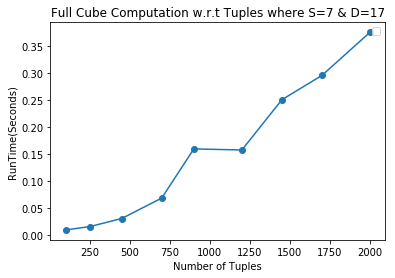

In [52]:
#Support 7
T = [100,250,450,700,900,1200,1450,1700,2000]
#T = [250, 500, 700, 900, 1100]
#Support = 49
#M77 = [79,79,79,78,77]
S = [0.0099,0.0160,0.0310,0.0690,0.1599,0.1579,0.2510,0.2960,0.3759]
import matplotlib.pyplot as plt 
plt.plot(T,S,marker='o') 
#plt.plot(T,M77, label = "Support = 49",marker='o') 
plt.ylabel("RunTime(Seconds)")
plt.xlabel("Number of Tuples")
plt.title("Full Cube Computation w.r.t Tuples where S=7 & D=17")
plt.legend()


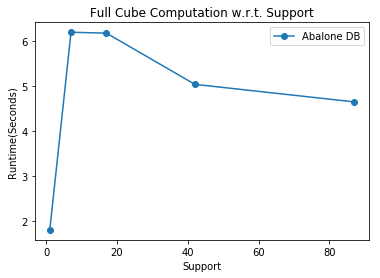

In [59]:
S = [1, 7, 17, 42, 87]
Twq = [0.20, 0.44, 0.49, 0.51, 0.47]  #Wine quality
Tf = [0.016, 0.046, 0.046, 0.048,0.057] #ForestFires
Tbb = [25.83, 99.08, 118.014,120.87, 122.70]     #bank
Tw = [0.09, 0.11, 0.11, 0.10, 0.095]  #wine
Tb = [0.06, 0.12, 0.116, 0.118, 0.118]   #breast
Ta = [1.80, 6.20, 6.18, 5.04, 4.65]   #abalone
import matplotlib.pyplot as plt 
#plt.plot(S,Twq,label = "Wine Quality DB",marker='o') 
#plt.plot(S,Tf, label = "Forestfire DB",marker='o') 
#plt.plot(S,Tbb, label = "Bank DB",marker='o') 
#plt.plot(S,Tw, label = "Wine DB",marker='o') 
#plt.plot(S,Tb, label = "Brest Cancer DB",marker='o') 
plt.plot(S,Ta, label = "Abalone DB",marker='o') 
plt.ylabel("Runtime(Seconds)")
plt.xlabel("Support")
plt.title("Full Cube Computation w.r.t. Support")
plt.legend()


Text(0.5,1,'Full Cube Computation w.r.t. Dimension where S = 2')

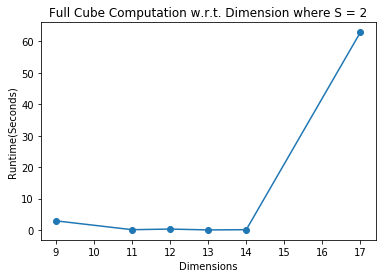

In [43]:
#T = [0.36,0.55,79,0.074,0.11,4.38]
#D = [12,13,17,14,11,9]
#Time 
D = [9,11,12,13,14,17]
T=[2.92,0.11,0.31,0.04,0.11,62.90]

import matplotlib.pyplot as plt 
plt.plot(D,T, marker='o') 
plt.ylabel("Runtime(Seconds)")
plt.xlabel("Dimensions")
plt.title("Full Cube Computation w.r.t. Dimension where S = 2")

In [60]:

db1 = [100, 250, 450, 700, 900, 1200, 1450, 1700, 1850, 2000]
for dbname in db1:

import os
import psutil
from collections import OrderedDict

def readData():
    cnt = 0
    
    fp = open("winequality-red.csv","r")   #GlassData
    dict_data = {} # defaultdict(dict) 
    for line in fp:
        if cnt == 0:
            val = line.strip("\n").split(";")
            val1 = val
        if cnt >= 1:
            val = line.strip('\n').split(";")
            dict_data[cnt - 1] = val   #{val[i]: 1}
        if cnt >= 500:
            break
        if cnt >= dbname:
            break
        cnt += 1
    fp.close()
    return dict_data   

def readData_count():   #Count of every value
    cnt = 0
    fp = open("winequality-red.csv","r")
    #fp = open("test.csv","r") #GlassData
    dict1_count = OrderedDict() #{} # defaultdict(dict) 
    for line in fp:
        if cnt == 0:
            val = line.strip('\n').split(";")
            val1 = val
            for j in val:
                dict1_count[j] = {} 
        if cnt >= 1:
            val = line.strip("\n").split(";")
            for i in range(0, len(val)):
                if val[i] in dict1_count[val1[i]].keys():
                    x = dict1_count[val1[i]][val[i]]
                    dict1_count[val1[i]][val[i]] = x + 1
                else:
                    dict1_count[val1[i]][val[i]] = 1   #{val[i]: 1}
        if cnt >= 500:
            break
        if cnt >= dbname:
            break
        cnt += 1
    fp.close()
    return dict1_count

def checkIceberg(dict2, apriori):
    for col_name in dict2.keys():
        for count in dict2[col_name].keys():
            if dict2[col_name][count] < apriori:
                (dict2[col_name][count]) = '*'
    return dict2

def UpdateData(dict_org, dict_count):
    i = 0
    for col_name in dict_count.keys():
        for count in dict_count[col_name].keys():
            if dict_count[col_name][count] == '*':
                for val in dict_org.keys():
                    #for i in range(0, len(dict_org[val])):
                    if dict_org[val][i] == count:
                        #print(dict_org[val][i], count)
                        dict_org[val][i] = '*'
        i = i+1
    return dict_org 

def reduced_table(dict_table):
    seen = set()
    dict_out = {}
    i = 0
    for count in dict_table.keys():
        t = tuple(dict_table[count])
        if t not in seen:
            seen.add(t)
            #dict_out[i] = dict_table[count]
            dict_out[t] = 1
        else:
            x = dict_out[t]
            dict_out[t] = x + 1
        i = i+1
    return dict_out

##############################code to make star tree below
class newNode: 
    def __init__(self, data): 
        self.elem = data  
        self.parent = None
        self.children = [None]
        self.childNum = 0
        self.sibling = None
        self.count = 0
        self.level = 0
        self.lastInsertion=None#Only used for root node

        
def insertChild(newElem, parent, count):
    if parent.childNum==0:#execute if it is the first child
        n = newNode(newElem)
        n.count=count
        n.parent=parent
        n.level=parent.level+1
        parent.children[parent.childNum]=n
        parent.childNum+=1
        return n
    if newElem != parent.children[parent.childNum-1].elem:#execute if there are no identical children
        n = newNode(newElem)
        n.count=count
        n.parent=parent
        n.level=parent.level+1
        if parent.childNum > 0:#make current child a sibling if there are other children
            parent.children[parent.childNum-1].sibling = n
        parent.children.append(n)
        parent.childNum+=1
        return n
    else:
        parent.children[parent.childNum-1].count+=count
        return parent.children[parent.childNum-1]#return previous child if the current child is 
                                                    #identical to previous child (works if db is sorted)

def insertChild2(newElem, parent, count):
    if parent.childNum==0:#execute if it is the first child
        n = newNode(newElem)
        n.count=count
        n.parent=parent
        n.level=parent.level+1
        parent.children[parent.childNum]=n
        parent.childNum+=1
        return n
    for child in parent.children:
        if newElem != child.elem:#execute if there are no identical children
            0
        else:
            child.count+=count
            return child#return previous child if the current child is 
                                                   #identical to previous child (works if db is sorted)
    n = newNode(newElem)
    n.count=count
    n.parent=parent
    n.level=parent.level+1
    if parent.childNum > 0:#make current child a sibling if there are other children
        parent.children[parent.childNum-1].sibling = n
    parent.children.append(n)
    parent.childNum+=1
    return n

    
def makeTree(db, root):
    root = newNode('root')
    count=0
    n = None
    for tup in db:
        count=0
        root.count+=tup[1]#adds the count of all direct children to root's count
        for elem in tup[0]:#gives the elements in the single tuple inside each Large tuple
            if count==0:
                n = insertChild(elem, root, tup[1])
            else:
                n = insertChild(elem, n, tup[1])
            count+=1
    return root
            
    
def bottomUpPrint(tree): 
    count = 0
    if tree.children[0] != None:#if the node has children execute
        for child in tree.children:
            bottomUp(tree.children[count])
            count+=1
    print(tree.elem, tree.count)
    
def giveSiblings(tree):
    count = 0
    if tree.children[0] != None:
        for child in tree.children:
            giveSiblings(tree.children[count])
            count+=1
    if tree.sibling != None:
        print(tree.elem)
        print(tree.sibling.elem)
        
##########################traversal code below


def getSubroot(nodeList, listLength):#create new subroot
    count1=0
    rootString=""
    subroot=None
    while count1 != len(nodeList):
        rootString=rootString+" "+nodeList[count1]
        count1+=1
    subroot=newNode(0)
    subroot.level=count1+1
    count1=1
    while count1 < (listLength-len(nodeList)):
        rootString=rootString+(chr(ord('A')+len(nodeList)+count1))
        count1+=1
    subroot.elem=rootString
    return subroot

def lastChild(tree):
    if tree.children[0] != None:
        return lastChild(tree.children[0])
    return tree
    
    
def nodeAtLevel2(root, insert):
    if root.lastInsertion!=None:
        return root.lastInsertion
    else: 
        return root
    

def printChildrenAndLeftBranch(node):
    while node.children[0]!=None:
        printImmediateChildren(node)
        node=node.children[0]

def printImmediateChildren(node):
    list=[]
    for child in node.children:
        if child !=None:
            list.append(child.elem)
    print(list)

def getChildrenCount(node):
    count=0
    for child in node.children:
        count+=child.count
    return count
    
def insertIntoSubTrees2(subTrees, insert):
    parent=None
    for subTree in subTrees:
        parent=nodeAtLevel2(subTree, insert)
        if parent.level==insert.level-1:
            subTree.lastInsertion=insertChild2(insert.elem, parent, insert.count)
            subTree.lastInsertion.parent.count=getChildrenCount(subTree.lastInsertion.parent)#updating count
            

def recPruning(currentNode, iceberg):
    if currentNode.count < iceberg:
        currentNode=currentNode.parent#go to parent and then delete fail child and update parent count
        currentNode.count-=currentNode.children[0].count
        currentNode.children.pop(0)
        if currentNode.count < iceberg:#if parent no longer passes iceberg either
            if currentNode.parent!=None:
                return currentNode
            else:
                return None
        else:
            return recPruning(currentNode.children[0], iceberg)
    return currentNode
    
       
def createSubTrees3(currentNode, dimension, traversedNodes, subTrees, iceberg):
    while currentNode.children[0]!=None:
        parentElem=currentNode.elem
        currentNode=currentNode.children[0]
        currentNode=recPruning(currentNode, iceberg)
        if currentNode.elem==parentElem:
            break
        insertIntoSubTrees2(subTrees, currentNode)
        subTree=getSubroot(traversedNodes, dimension)
        subTree.count=currentNode.parent.count
        traversedNodes.append(currentNode.elem)#old
        subTrees.append(subTree)
    return currentNode
    

    
def traversal2(currentNode, listOfTuples, iceberg):
    dimension=len(listOfTuples[0][0])
    subTrees=[]
    traversedNodes=[]
    treeRoot=currentNode
    for i in range(len(listOfTuples)):
        #print("Begin down")
        currentNode=createSubTrees3(currentNode, dimension, traversedNodes, subTrees, iceberg)#updates subTrees traversedNodes, not currentNode
        #print("Begin Up")
        currentNode=goUp2(currentNode, subTrees, traversedNodes, iceberg)
        if len(subTrees)==0:
            break#end traversal once there are no more subTrees
    
    
        
    
def printWholeTree(subTree):
    if subTree.children[0]!=None:
        print('children of ', subTree.elem, " are")
        printImmediateChildren(subTree)
        for child in subTree.children:
            printWholeTree(child)
        

    
def deleteBranch(tree):#deletes 1st branch and returns it
    list=[]
    if tree.children[0] != None:
        tree.count-=lastChild(tree).count
        list.append(tree.children[0].elem)
        list+=deleteBranch(tree.children[0])
        if tree.children[0].count == 0:
            tree.children.pop(0)
            if len(tree.children)==0:
                tree.children=[None]
    else:
        tree.count=0
    return list

def printBranch(tree):
    list=[]
    count=lastChild(tree).count
    list.append(tree.elem)
    list.append(deleteBranch(tree))
    list.append(count)
    #print(list)
    global printCount
    printCount+=1
    
def printTree(subTree):
    while subTree.children[0]!=None:
        printBranch(subTree)
    if subTree.count==0:
        subTree=None
    else:
        printBranch(subTree)


        
def goUp2(currentNode, subTrees, traversedNodes, iceberg):
    count=0
    while currentNode.sibling==None:
        if len(subTrees)==0:#throws error at end if otherwise
            break
        currentNode=currentNode.parent
        printTree(subTrees[-1])
        subTrees.pop()
        traversedNodes.pop()
        for sub in subTrees:#moves the last position of insertion up as we traverse up for all trees
            if sub.lastInsertion!=None:
                sub.lastInsertion=sub.lastInsertion.parent
    for sub in subTrees:
        if sub.lastInsertion!=None:
            sub.lastInsertion=sub.lastInsertion.parent#does this one more time for all trees
    if len(subTrees)!=0:#throws error at end if otherwise
        currentNode=currentNode.parent
        currentNode.children.pop(0)
        traversedNodes.pop()#old
        traversedNodes.append(currentNode.children[0].elem)#
        currentNode=currentNode.children[0]#
    insertIntoSubTrees2(subTrees, currentNode)
    return currentNode
  

if __name__ == '__main__':
    dict_data = readData()
    dict1_count = readData_count()
    apriori = 59
    dict_iceberg = checkIceberg(dict1_count,apriori)
    dict_updated_data = UpdateData(dict_data, dict_iceberg)
    dict_reduced = reduced_table(dict_updated_data)

    tp = sorted(dict_reduced.items())
    #print(dict_data)
    root = None
    #tp = [(('a1', 'b*', 'c*', 'd*'), 1), (('a1', 'b1', 'c*', 'd*'), 2), (('a2', 'b*', 'c3', 'd4'), 2)]
    
    theTree = makeTree(tp, root)
    printCount=0
    traversal2(theTree, tp, apriori)
    #print(time.time() - start_time)
    #print(printCount)
    process = psutil.Process(os.getpid())
    print(process.memory_info().rss/1000000) 



130


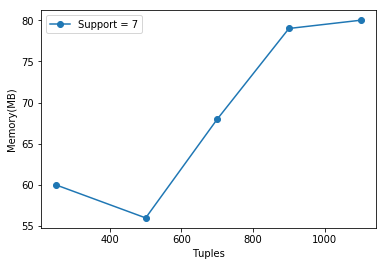

In [17]:
#Support 7
M7 = [60, 56, 68, 79, 80]
#T = [250, 500, 700, 900, 1100]
#Support = 49
M77 = [79,79,79,78,77]
T = [250,500,700,900,1100]
import matplotlib.pyplot as plt 
plt.plot(T,M7,label = "Support = 7",marker='o') 
#plt.plot(T,M77, label = "Support = 49",marker='o') 
plt.ylabel("Memory(MB)")
plt.xlabel("Tuples")
plt.legend()


In [61]:
import time
start_time = time.time()
import os
import psutil
from collections import OrderedDict

def readData():    #Reading the Data file
    cnt = 0
    
    fp = open("winequality-red.csv","r")   
    dict_data = {}
    for line in fp:
        if cnt == 0:
            val = line.strip("\n").split(";")
            val1 = val
        if cnt >= 1:
            val = line.strip('\n').split(";")
            dict_data[cnt - 1] = val  
        cnt += 1
    fp.close()
    return dict_data   

def readData_count():   #Count of every value
    cnt = 0
    fp = open("winequality-red.csv","r")
    dict1_count = OrderedDict() 
    for line in fp:
        if cnt == 0:
            val = line.strip('\n').split(";")
            val1 = val
            for j in val:
                dict1_count[j] = {} 
        if cnt >= 1:
            val = line.strip("\n").split(";")
            for i in range(0, len(val)):
                if val[i] in dict1_count[val1[i]].keys():
                    x = dict1_count[val1[i]][val[i]]
                    dict1_count[val1[i]][val[i]] = x + 1
                else:
                    dict1_count[val1[i]][val[i]] = 1   #{val[i]: 1}
        cnt += 1
    fp.close()
    return dict1_count

def checkIceberg(dict2, apriori):   #Checking Iceberg Cnndition for data element
    for col_name in dict2.keys():
        for count in dict2[col_name].keys():
            if dict2[col_name][count] < apriori:
                (dict2[col_name][count]) = '*'
    return dict2

def UpdateData(dict_org, dict_count):  #Abstracting Data Element which do not satisfy Iceberg Condition
    i = 0
    for col_name in dict_count.keys():
        for count in dict_count[col_name].keys():
            if dict_count[col_name][count] == '*':
                for val in dict_org.keys():
                    #for i in range(0, len(dict_org[val])):
                    if dict_org[val][i] == count:
                        #print(dict_org[val][i], count)
                        dict_org[val][i] = '*'
        i = i+1
    return dict_org 

def reduced_table(dict_table):    #Generating the reduced star table
    seen = set()
    dict_out = {}
    i = 0
    for count in dict_table.keys():
        t = tuple(dict_table[count])
        if t not in seen:
            seen.add(t)
            #dict_out[i] = dict_table[count]
            dict_out[t] = 1
        else:
            x = dict_out[t]
            dict_out[t] = x + 1
        i = i+1
    return dict_out

##############################code to make star tree below
class newNode: 
    def __init__(self, data): 
        self.elem = data  
        self.parent = None
        self.children = [None]
        self.childNum = 0
        self.sibling = None
        self.count = 0
        self.level = 0
        self.lastInsertion=None#Only used for root node

        
def insertChild(newElem, parent, count):
    if parent.childNum==0:#execute if it is the first child
        n = newNode(newElem)
        n.count=count
        n.parent=parent
        n.level=parent.level+1
        parent.children[parent.childNum]=n
        parent.childNum+=1
        return n
    if newElem != parent.children[parent.childNum-1].elem:#execute if there are no identical children
        n = newNode(newElem)
        n.count=count
        n.parent=parent
        n.level=parent.level+1
        if parent.childNum > 0:#make current child a sibling if there are other children
            parent.children[parent.childNum-1].sibling = n
        parent.children.append(n)
        parent.childNum+=1
        return n
    else:
        parent.children[parent.childNum-1].count+=count
        return parent.children[parent.childNum-1]#return previous child if the current child is 
                                                    #identical to previous child (works if db is sorted)

def insertChild2(newElem, parent, count):
    if parent.childNum==0:#execute if it is the first child
        n = newNode(newElem)
        n.count=count
        n.parent=parent
        n.level=parent.level+1
        parent.children[parent.childNum]=n
        parent.childNum+=1
        return n
    for child in parent.children:
        if newElem != child.elem:#execute if there are no identical children
            0
        else:
            child.count+=count
            return child#return previous child if the current child is 
                                                   #identical to previous child (works if db is sorted)
    n = newNode(newElem)
    n.count=count
    n.parent=parent
    n.level=parent.level+1
    if parent.childNum > 0:#make current child a sibling if there are other children
        parent.children[parent.childNum-1].sibling = n
    parent.children.append(n)
    parent.childNum+=1
    return n

    
def makeTree(db, root):
    root = newNode('root')
    count=0
    n = None
    for tup in db:
        count=0
        root.count+=tup[1]#adds the count of all direct children to root's count
        for elem in tup[0]:#gives the elements in the single tuple inside each Large tuple
            if count==0:
                n = insertChild(elem, root, tup[1])
            else:
                n = insertChild(elem, n, tup[1])
            count+=1
    return root
            
    
def bottomUpPrint(tree): 
    count = 0
    if tree.children[0] != None:#if the node has children execute
        for child in tree.children:
            bottomUp(tree.children[count])
            count+=1
    print(tree.elem, tree.count)
    
def giveSiblings(tree):
    count = 0
    if tree.children[0] != None:
        for child in tree.children:
            giveSiblings(tree.children[count])
            count+=1
    if tree.sibling != None:
        print(tree.elem)
        print(tree.sibling.elem)
        
##########################traversal code below


def getSubroot(nodeList, listLength):#create new subroot
    count1=0
    rootString=""
    subroot=None
    while count1 != len(nodeList):
        rootString=rootString+" "+nodeList[count1]
        count1+=1
    subroot=newNode(0)
    subroot.level=count1+1
    count1=1
    while count1 < (listLength-len(nodeList)):
        rootString=rootString+(chr(ord('A')+len(nodeList)+count1))
        count1+=1
    subroot.elem=rootString
    return subroot

def lastChild(tree):
    if tree.children[0] != None:
        return lastChild(tree.children[0])
    return tree
    
    
def nodeAtLevel2(root, insert):
    if root.lastInsertion!=None:
        return root.lastInsertion
    else: 
        return root
    

def printChildrenAndLeftBranch(node):
    while node.children[0]!=None:
        printImmediateChildren(node)
        node=node.children[0]

def printImmediateChildren(node):
    list=[]
    for child in node.children:
        if child !=None:
            list.append(child.elem)
    print(list)

def getChildrenCount(node):
    count=0
    for child in node.children:
        count+=child.count
    return count
    
def insertIntoSubTrees2(subTrees, insert):
    parent=None
    for subTree in subTrees:
        parent=nodeAtLevel2(subTree, insert)
        if parent.level==insert.level-1:
            subTree.lastInsertion=insertChild2(insert.elem, parent, insert.count)
            subTree.lastInsertion.parent.count=getChildrenCount(subTree.lastInsertion.parent)#updating count
            

def recPruning(currentNode, iceberg):
    if currentNode.count < iceberg:
        currentNode=currentNode.parent#go to parent and then delete fail child and update parent count
        currentNode.count-=currentNode.children[0].count
        currentNode.children.pop(0)
        if currentNode.count < iceberg:#if parent no longer passes iceberg either
            if currentNode.parent!=None:
                return currentNode
            else:
                return None
        else:
            return recPruning(currentNode.children[0], iceberg)
    return currentNode
    
       
def createSubTrees3(currentNode, dimension, traversedNodes, subTrees, iceberg):
    while currentNode.children[0]!=None:
        parentElem=currentNode.elem
        currentNode=currentNode.children[0]
        currentNode=recPruning(currentNode, iceberg)
        if currentNode.elem==parentElem:
            break
        insertIntoSubTrees2(subTrees, currentNode)
        subTree=getSubroot(traversedNodes, dimension)
        subTree.count=currentNode.parent.count
        traversedNodes.append(currentNode.elem)#old
        subTrees.append(subTree)
    return currentNode
    

    
def traversal2(currentNode, listOfTuples, iceberg):
    dimension=len(listOfTuples[0][0])
    subTrees=[]
    traversedNodes=[]
    treeRoot=currentNode
    for i in range(len(listOfTuples)):
        print("Begin down")
        currentNode=createSubTrees3(currentNode, dimension, traversedNodes, subTrees, iceberg)#updates subTrees traversedNodes, not currentNode
        print("Begin Up")
        currentNode=goUp2(currentNode, subTrees, traversedNodes, iceberg)
        if len(subTrees)==0:
            break#end traversal once there are no more subTrees
    
    
        
    
def printWholeTree(subTree):
    if subTree.children[0]!=None:
        print('children of ', subTree.elem, " are")
        printImmediateChildren(subTree)
        for child in subTree.children:
            printWholeTree(child)
        

    
def deleteBranch(tree):#deletes 1st branch and returns it
    list=[]
    if tree.children[0] != None:
        tree.count-=lastChild(tree).count
        list.append(tree.children[0].elem)
        list+=deleteBranch(tree.children[0])
        if tree.children[0].count == 0:
            tree.children.pop(0)
            if len(tree.children)==0:
                tree.children=[None]
    else:
        tree.count=0
    return list

def printBranch(tree):
    list=[]
    count=lastChild(tree).count
    list.append(tree.elem)
    list.append(deleteBranch(tree))
    list.append(count)
    print(list)
    global printCount
    printCount+=1
    
def printTree(subTree):
    while subTree.children[0]!=None:
        printBranch(subTree)
    if subTree.count==0:
        subTree=None
    else:
        printBranch(subTree)


        
def goUp2(currentNode, subTrees, traversedNodes, iceberg):
    count=0
    while currentNode.sibling==None:
        if len(subTrees)==0:#throws error at end if otherwise
            break
        currentNode=currentNode.parent
        printTree(subTrees[-1])
        subTrees.pop()
        traversedNodes.pop()
        for sub in subTrees:#moves the last position of insertion up as we traverse up for all trees
            if sub.lastInsertion!=None:
                sub.lastInsertion=sub.lastInsertion.parent
    for sub in subTrees:
        if sub.lastInsertion!=None:
            sub.lastInsertion=sub.lastInsertion.parent#does this one more time for all trees
    if len(subTrees)!=0:#throws error at end if otherwise
        currentNode=currentNode.parent
        currentNode.children.pop(0)
        traversedNodes.pop()#old
        traversedNodes.append(currentNode.children[0].elem)#
        currentNode=currentNode.children[0]#
    insertIntoSubTrees2(subTrees, currentNode)
    return currentNode
  

if __name__ == '__main__':
    dict_data = readData()
    dict1_count = readData_count()
    apriori = 2
    dict_iceberg = checkIceberg(dict1_count,apriori)
    dict_updated_data = UpdateData(dict_data, dict_iceberg)
    dict_reduced = reduced_table(dict_updated_data)

    lexico_sorted = sorted(dict_reduced.items())   #Lexicographically Sorting the data
    root = None
    
    theTree = makeTree(lexico_sorted, root)
    printCount=0
    traversal2(theTree, lexico_sorted, apriori)
    print("Execution Time(Seconds)",time.time() - start_time)
    print(printCount)
    process = psutil.Process(os.getpid())
    print("Memory in MB",process.memory_info().rss/1000000) 



Begin down
Begin Up
Begin down
Begin Up
Begin down
Begin Up
Begin down
Begin Up
[' *CDEFGHIJKL', [], 5]
Begin down
Begin Up
[' 10 0.32 0.59 2.2 0.077 3 15 0.9994 3.2 0.78 9.6', [], 2]
[' 10 0.32 0.59 2.2 0.077 3 15 0.9994 3.2 0.78L', ['5'], 2]
[' 10 0.32 0.59 2.2 0.077 3 15 0.9994 3.2KL', ['9.6', '5'], 2]
[' 10 0.32 0.59 2.2 0.077 3 15 0.9994JKL', ['0.78', '9.6', '5'], 2]
[' 10 0.32 0.59 2.2 0.077 3 15IJKL', ['3.2', '0.78', '9.6', '5'], 2]
[' 10 0.32 0.59 2.2 0.077 3HIJKL', ['0.9994', '3.2', '0.78', '9.6', '5'], 2]
[' 10 0.32 0.59 2.2 0.077GHIJKL', ['15', '0.9994', '3.2', '0.78', '9.6', '5'], 2]
[' 10 0.32 0.59 2.2FGHIJKL', ['3', '15', '0.9994', '3.2', '0.78', '9.6', '5'], 2]
[' 10 0.32 0.59EFGHIJKL', ['0.077', '3', '15', '0.9994', '3.2', '0.78', '9.6', '5'], 2]
[' 10 0.32DEFGHIJKL', ['2.2', '0.077', '3', '15', '0.9994', '3.2', '0.78', '9.6', '5'], 2]
Begin down
Begin Up
Begin down
Begin Up
Begin down
Begin Up
Begin down
Begin Up
Begin down
Begin Up
Begin down
Begin Up
Begin down
Begin